# 11.1 Complex Seasonality
 
High frequency data has seasonal patterns not just yearly but daily , weekly and annual. 

Examples : 
call volume in call centres, daily hospital admissions, requests for cash at ATMs, electricity and water usage, and access to computer web sites.
( sounds all like poisson distribution? )

Issues:
 - multiple seasonality time series
 - non - integer frequencies ( weekly data would have frequency
   as 365.25/7 =  52.179 average)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
calls = pd.read_csv("./data/calls.csv")
# calls = calls[['x']]
## Five-minute call volume handled on weekdays between
## 7:00am and 9:05pm, from 3 March 2003 to 23 May 2003.

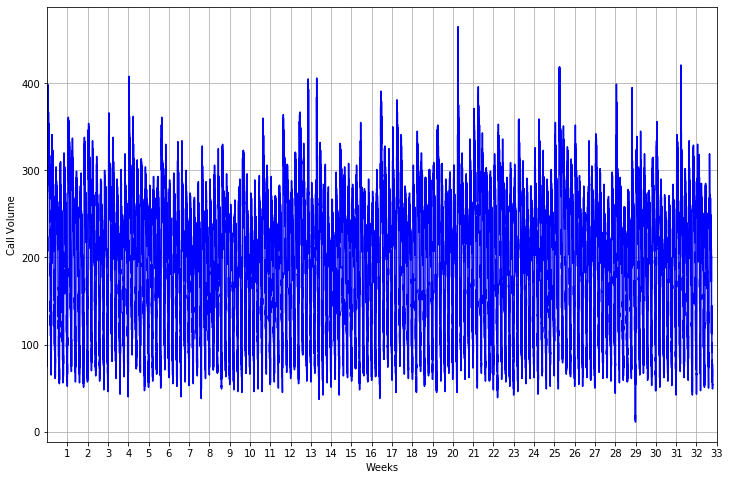

In [2]:
calls.x.plot(style='-b',grid=True,figsize=(12,8)).set(xlabel='Weeks',ylabel='Call Volume')
_ = plt.xticks(ticks=[169*5*i for i in range(1,34)],labels=list(range(1,34)))

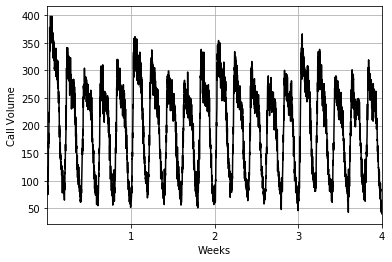

In [3]:
calls.iloc[:169*4*5].x.plot(style='-k',grid=True).set(xlabel='Weeks',ylabel='Call Volume')
_ = plt.xticks(ticks=[169*5,169*5*2,169*5*3,169*5*4],labels=['1','2','3','4'])

In [4]:
date_range = pd.date_range(start=pd.datetime(2003,3,3),periods=164,freq='B')
time_range = pd.date_range("07:05","21:05",freq="05min").time
sane_date = pd.Series()
for time in time_range:
    sane_date =  pd.concat([sane_date,pd.Series(date_range.strftime("%Y-%m-%d")+ " " + time.strftime("%H-%M-%S"))],axis=0)

sane_date = pd.to_datetime(sane_date,format='%Y-%m-%d %H-%M-%S')
sane_date = sane_date.sort_values()

calls.index = sane_date

In [5]:
# STL with multiple seasonal periods

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
plt.Figure(figsize=(12,8))
result_daily = seasonal_decompose(calls.x,period=169)
result_week = seasonal_decompose(calls.x,period=169*5)

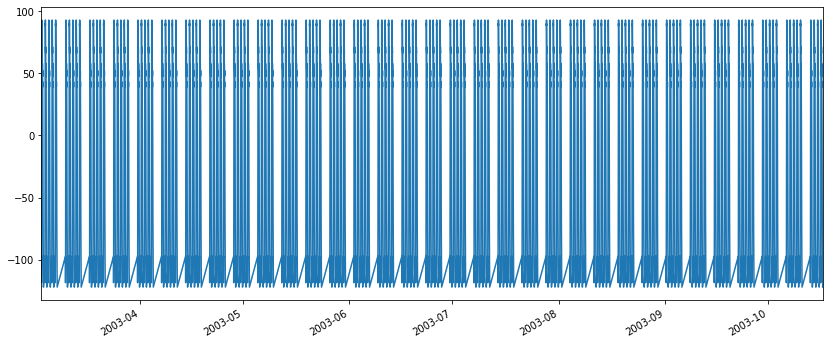

In [8]:
seasonalresult_daily..plot(figsize=(14,6))

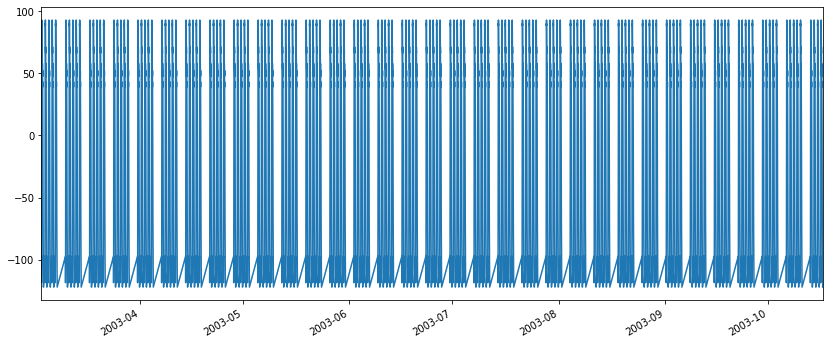

In [9]:
result_daily.seasonal.plot(figsize=(14,6))

In [10]:
plt.Figure(figsize=(12,8))
result_daily = seasonal_decompose(calls.x,period=169)
calls_daily_seaonal_removed = calls.x - result_daily.seasonal 
result_week = seasonal_decompose(calls_daily_seaonal_removed,period=169*5)

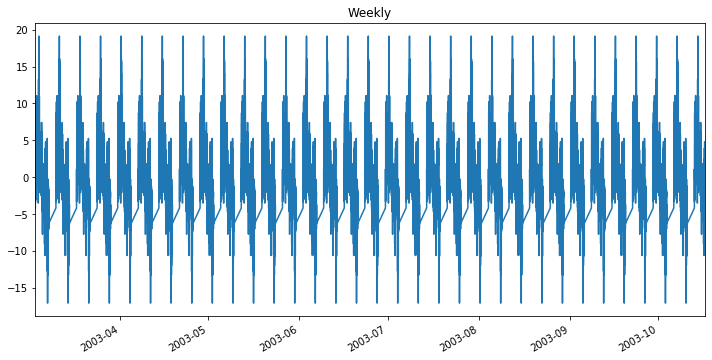

In [11]:
_ = result_week.seasonal.plot(figsize=(12,6)).set(title="Weekly")
# the weekly seasonality is weak.

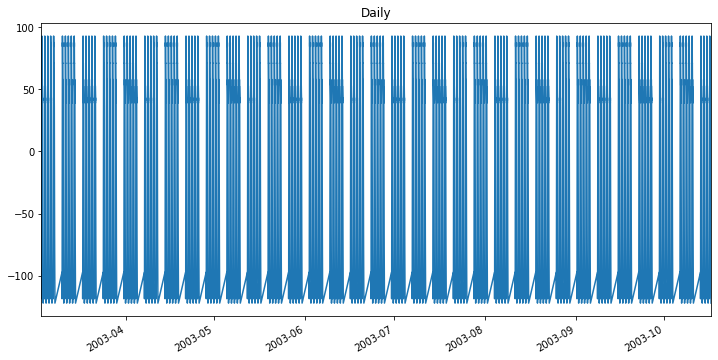

In [12]:
_ = result_daily.seasonal.plot(figsize=(12,6)).set(title="Daily")

## Dynamic harmonic regression with mutiple seasonal periods

In [13]:
import statsmodels.api as sm
# "Ginzberg" is item name while "carData" is package name
df = sm.datasets.get_rdataset("sunspotarea", "fpp2").data

In [14]:
df.set_index("time",inplace=True)

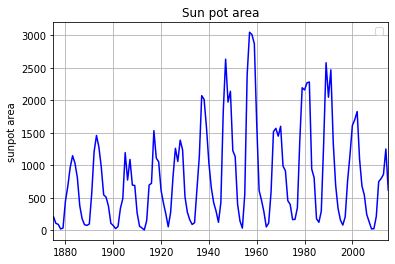

In [15]:
df.plot(color='b',grid=True).set(title='Sun pot area'
                                 ,xlabel=''
                                 ,ylabel='sunpot area')
_ = plt.legend("")

In [16]:
from sklearn.neural_network import MLPRegressor

In [17]:
ts = pd.DataFrame()
# ts = df['value']

In [18]:
def add_lag_features(df,window=5):
    """
    df is the series
    """
    df_feat = pd.concat([df.shift(i) for i in range(1,window+1) ],1,keys=list(range(1,window+1)))
    df_feat = df_feat.add_prefix('t-')
    df_feat['y'] = df
    return df_feat.dropna()

In [19]:
feat = add_lag_features(df['value'],7)

In [20]:
X = feat.drop("y",axis=1)
y = feat['y']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,shuffle=False)

In [45]:
fit = MLPRegressor(hidden_layer_sizes=6).fit(X_train,y_train)

C:\Users\91882\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [46]:
y_pred = fit.predict(X_test)
y_pred = pd.Series(y_pred,index=y_test.index)

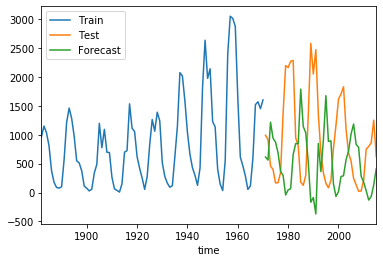

In [47]:
ax = y_train.plot()
y_test.plot(ax=ax)
y_pred.plot(ax=ax)
plt.legend(['Train','Test','Forecast'])

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
rmse = pd.np.sqrt(mean_squared_error(y_test,y_pred))

print("RMSE : {:.2f}".format(rmse))

RMSE : 674.50


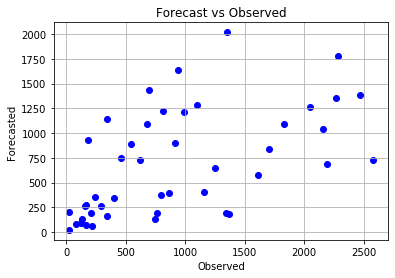

In [27]:
plt.scatter(y_test,y_pred,color='b')
plt.xlabel("Observed")
plt.ylabel("Forecasted")
plt.title("Forecast vs Observed")
plt.grid(True)

In [28]:
 debitcard = sm.datasets.get_rdataset("debitcards", "fpp2").data

In [29]:
from utils import ease

In [30]:
debitcard = ease.convert_r_dataframe_to_python(debitcard)
debitcard.set_index("date",inplace=True)

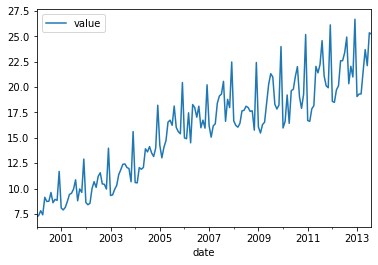

In [31]:
debitcard.plot()

In [32]:
from scipy.stats import boxcox

In [33]:
dcard,lmbda = boxcox(debitcard.values.flatten())
print("Lambda : {:.2f}".format(lmbda))

Lambda : 0.81


In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
results = seasonal_decompose(debitcard,period=12)

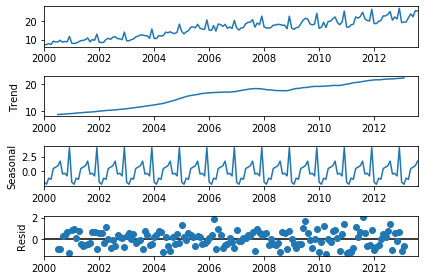

In [36]:
results.plot();

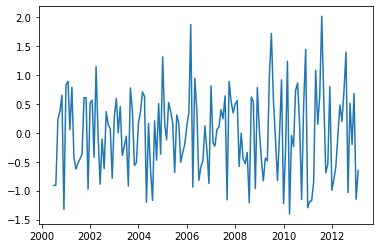

In [37]:
plt.plot(results.resid)

- First, the time series is Box-Cox-transformed
-  and then decomposed into trend, seasonal and remainder components .
- Then we obtain shuffled versions of the remainder component to get bootstrapped remainder series.

Because there may be autocorrelation present in remainder series, we cannot simply use the re-draw procedure .

Instead, we use a “blocked bootstrap”, where contiguous sections of the time series are selected at random and joined together.These bootstrapped remainder series are added to the trend and seasonal components, and the Box-Cox transformation is reversed to give variations on the original time series.

In [38]:
bootstrap =add_lag_features (results.resid,10)

In [39]:
bootstrap = bootstrap.drop('y',axis=1).values

In [40]:
bootstrap[1,:]

array([-0.43054251,  0.78557902,  0.05452346,  0.88911374,  0.83007207,
       -1.32526126,  0.64809771,  0.36864899,  0.23224194, -0.90706254])

In [42]:
import statsmodels
statsmodels.__version__

'0.11.0'